In [391]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Load temperature data

In [392]:
temp=pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [393]:
temp.info()
temp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


Temperatures are floats in degrees Celcius. Date column is an object which needs to be converted to a date time. There are several thousand null values in the temperature fields. The data also goes back to the 1700's, which is farther back than we really need.

We will convert the date column to a date, convert the average temperature to Fahrenheit, drop null values, and retain only observations after 1900.

In [394]:
#Covert date column to datetime
temp['Date']=temp['dt'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  object        
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
 4   Date                           577462 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 22.0+ MB


In [395]:
#1900 to date
temp=temp[temp['Date']>='1900-01-01']
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Date
1874,1900-01-01,-3.026,0.538,Åland,1900-01-01
1875,1900-02-01,-8.063,0.657,Åland,1900-02-01
1876,1900-03-01,-3.196,0.467,Åland,1900-03-01
1877,1900-04-01,0.781,0.224,Åland,1900-04-01
1878,1900-05-01,4.960,0.503,Åland,1900-05-01


In [396]:
temp['AverageTemperature'].isnull().sum()


1050

Now about 1000 missing temperature values. We will investigate those missing values.

In [397]:
#Display some of the observations with missing temperature values
temp[temp['AverageTemperature'].isnull()]


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Date
3238,2013-09-01,NaN,NaN,Åland,2013-09-01
5344,2013-09-01,NaN,NaN,Afghanistan,2013-09-01
7309,2013-09-01,NaN,NaN,Africa,2013-09-01
10548,2013-09-01,NaN,NaN,Albania,2013-09-01
13269,2013-09-01,NaN,NaN,Algeria,2013-09-01
...,...,...,...,...,...
566880,2013-09-01,NaN,NaN,Vietnam,2013-09-01
571878,2013-09-01,NaN,NaN,Western Sahara,2013-09-01
573531,2013-09-01,NaN,NaN,Yemen,2013-09-01
575496,2013-09-01,NaN,NaN,Zambia,2013-09-01


Each of these observations is dated 9/1/2013. What is the most recent set of observation dates?

In [398]:
max(temp['Date'])

Timestamp('2013-09-01 00:00:00')

Are there other dates missing values?

In [399]:
temp[temp['AverageTemperature'].isnull()].groupby('Date').count()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
Date,,,,
1900-01-01,2,0,0,2
1900-02-01,2,0,0,2
1900-03-01,2,0,0,2
1900-04-01,2,0,0,2
1900-05-01,2,0,0,2
...,...,...,...,...
2013-05-01,1,0,1,1
2013-06-01,1,0,1,1
2013-07-01,1,0,1,1


222 of 243 of the observations for 9/1/2013 contain missing temperature values. This could indicate incomplete data for 9/1/2013. Due to the high rate of missing values for 9/1/2013 and it being the last date in the data set, we will drop observations related to September 2013.

In [400]:
temp=temp[temp['Date']!='2013-09-01']
temp['AverageTemperature'].isnull().sum()

828

We still have 828 other missing values. Are these missing data common in certain countries?

In [401]:
temp[temp['AverageTemperature'].isnull()].groupby('Country').count()

,dt,AverageTemperature,AverageTemperatureUncertainty,Date
Country,,,,
Antarctica,763,0,739,763
Federated States Of Micronesia,30,0,0,30
French Polynesia,6,0,0,6
French Southern And Antarctic Lands,4,0,0,4
Heard Island And Mcdonald Islands,4,0,0,4
Palau,20,0,0,20
South Georgia And The South Sandwich Isla,1,0,0,1


Antarctica is the source of the majority of the missing temperature values. The continent of Antarctica is not a country we are concerned with determining the climate and will be dropped. The other missing values are concentrated to a handful of small, mostly island nations.
Let's look more closely at the missing data to determine if there is a pattern.

In [402]:
temp[(temp['Country']=='French Southern And Antarctic Lands') & (temp['AverageTemperature'].isnull())]
#French Southern And Antarctic Lands is missing the first 2 months of observations recorded for it and then two in a row the following year.
#Backfill or drop

temp[(temp['Country']=='Federated States Of Micronesia') & (temp['AverageTemperature'].isnull())]
#Federated States Of Micronesia is missing the first 2 full years of observations and then a string of 7 months in a row.
#Drop these

temp[(temp['Country']=='French Polynesia') & (temp['AverageTemperature'].isnull())]
#French Polynesia is missing the first 4 observations and then 2 other nonconsecutive
#Fill or drop

temp[(temp['Country']=='Heard Island And Mcdonald Islands') & (temp['AverageTemperature'].isnull())]
#Similar to the French Southern Lands, Heard Island And Mcdonald Islands is missing the first 2 months and then 2 more next year

temp[(temp['Country']=='Palau') & (temp['AverageTemperature'].isnull())]
#Palau is missing almost all the observations in the first 2 years.
#Drop these

temp[(temp['Country']=='South Georgia And The South Sandwich Isla') & (temp['AverageTemperature'].isnull())]['Date'].min()
#South Georgia And The South Sandwich Isla is missing it's first observation
#Drop or backfill

Timestamp('1902-12-01 00:00:00')

For simplicity, let's drop all missing values

In [403]:
#drop Na's
temp.dropna(inplace=True)
temp.drop(columns='dt', inplace=True)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328797 entries, 1874 to 577460
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   AverageTemperature             328797 non-null  float64       
 1   AverageTemperatureUncertainty  328797 non-null  float64       
 2   Country                        328797 non-null  object        
 3   Date                           328797 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 12.5+ MB


Now we'll convert the temperature to fahrenheit

In [404]:
#Convert temperature to fahrenheit
temp['Avg Temp Fahrenheit']=temp['AverageTemperature'].apply(lambda x: (x*1.8)+32)
temp.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,Date,Avg Temp Fahrenheit
1874,-3.026,0.538,Åland,1900-01-01,26.5532
1875,-8.063,0.657,Åland,1900-02-01,17.4866
1876,-3.196,0.467,Åland,1900-03-01,26.2472
1877,0.781,0.224,Åland,1900-04-01,33.4058
1878,4.960,0.503,Åland,1900-05-01,40.9280


In [405]:
#Calculate average temp for each country
country_temps=temp.groupby('Country')['Avg Temp Fahrenheit'].mean()
country_temps
print(country_temps.nlargest(10))
print(country_temps.nsmallest(10))

Country
Djibouti                83.986774
Mali                    83.514618
Burkina Faso            82.917629
Senegal                 82.634104
Aruba                   82.618064
United Arab Emirates    82.177783
Mauritania              82.016101
Gambia                  81.858790
Niger                   81.703632
Curaçao                 81.598401
Name: Avg Temp Fahrenheit, dtype: float64
Country
Greenland                                    -0.734238
Denmark                                       0.221670
Svalbard And Jan Mayen                       19.265252
Russia                                       22.698298
Canada                                       23.444835
Mongolia                                     31.074110
Norway                                       32.842550
South Georgia And The South Sandwich Isla    34.581059
Finland                                      35.003499
Iceland                                      35.197170
Name: Avg Temp Fahrenheit, dtype: float64


In [406]:
country_temps[country_temps<=40].nlargest(15)

Country
Tajikistan                                   39.685596
Kyrgyzstan                                   38.281566
Sweden                                       36.971802
Heard Island And Mcdonald Islands            36.611807
North America                                36.391026
Iceland                                      35.197170
Finland                                      35.003499
South Georgia And The South Sandwich Isla    34.581059
Norway                                       32.842550
Mongolia                                     31.074110
Canada                                       23.444835
Russia                                       22.698298
Svalbard And Jan Mayen                       19.265252
Denmark                                       0.221670
Greenland                                    -0.734238
Name: Avg Temp Fahrenheit, dtype: float64

Will need to remove Continents
Some European countries have multiple entries. Maybe european and colonial areas?

In [407]:
country_temps[country_temps.index.str.contains(r'\(Europe\)')]

Country
Denmark (Europe)           46.677595
France (Europe)            51.243013
Netherlands (Europe)       48.958491
United Kingdom (Europe)    48.078194
Name: Avg Temp Fahrenheit, dtype: float64

In [408]:
country_temps[country_temps.index.isin(['North America', 'South America', 'Africa', 'Europe', 'Asia','Antarctica', 'Åland', 'Western Sahara', 'France', 'France (Europe)'])]
#temp[temp['Country'].isin(['France','France (Europe)'])].sort_values(by=['Date'])
country_temps[country_temps.index.isin(['France','France (Europe)','Denmark (Europe)','Denmark','Netherlands (Europe)','Netherlands','United Kingdom (Europe)','United Kingdom'])]

Country
Denmark                     0.221670
Denmark (Europe)           46.677595
France                     55.509471
France (Europe)            51.243013
Netherlands                49.665093
Netherlands (Europe)       48.958491
United Kingdom             47.786381
United Kingdom (Europe)    48.078194
Name: Avg Temp Fahrenheit, dtype: float64

Appears as those the "Europe" countries are a little cooler, indicating the non-Europe measurements might be worldwide including territorial locations. We'll drop the territorial measurements and then rename the "Europe" observations to remove the "Europe" tag.

In [409]:
import re
#Remove continents, regions, and colonial areas
country_temps=country_temps[~country_temps.index.isin(['North America', 'South America', 'Africa', 'Europe', 'Asia','Antarctica', 'Åland', 'France','Denmark','Netherlands','United Kingdom'])]
#Rename the European countries which had separate worldwide measurements
country_temps.index=country_temps.index.map(lambda x: x.replace(' (Europe)', '') if '(Europe)' in x else x)

#Validate
country_temps[country_temps.index.isin(['France','France (Europe)','Denmark (Europe)','Denmark','Netherlands (Europe)','Netherlands','United Kingdom (Europe)','United Kingdom'])]

Country
Denmark           46.677595
France            51.243013
Netherlands       48.958491
United Kingdom    48.078194
Name: Avg Temp Fahrenheit, dtype: float64

Plots to understand the distribution of the data.

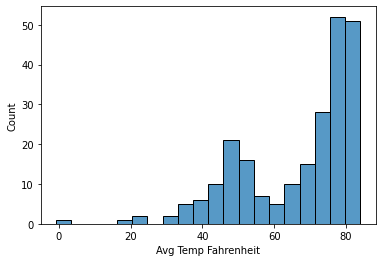

In [410]:
sns.histplot(data=country_temps, bins=20)
plt.show()

Small bimodal curve. Capture the 2 humps in moderate and high climate by cutting in the dips.

/var/folders/j_/38n39dnj4z9gdmy4w2vpg1pr0000gn/T/ipykernel_96548/326786163.py:6: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


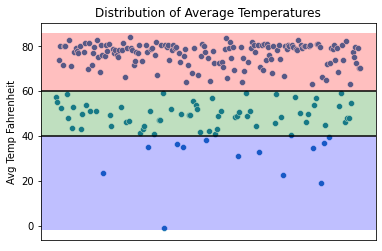

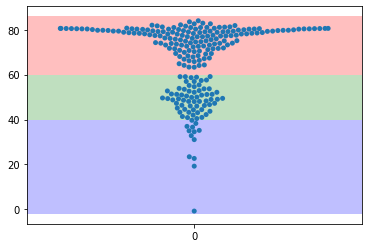

In [411]:
#Scatterplot with potential climate category lines
sns.scatterplot(data=country_temps)
plt.axhline(y = 60, color = 'black', linestyle = '-')
plt.axhline(y = 40, color = 'black', linestyle = '-')
plt.title('Distribution of Average Temperatures')
plt.xticks([])
plt.xlabel('')
plt.axhspan(60, 86, color='red', alpha=0.25, lw=0)
plt.axhspan(40, 60, color='green', alpha=0.25, lw=0)
plt.axhspan(-2, 40, color='blue', alpha=0.25, lw=0)
plt.show()

sns.swarmplot(data=country_temps)
plt.axhspan(60, 86, color='red', alpha=0.25, lw=0)
plt.axhspan(40, 60, color='green', alpha=0.25, lw=0)
plt.axhspan(-2, 40, color='blue', alpha=0.25, lw=0)
plt.show()

Create a categorical bin of 3 climates (cold, moderate, hot) based on the distribution of average temperatures.

In [412]:
climate=pd.DataFrame(country_temps)
climate['Climate']=pd.cut(country_temps,[-200,40,60,300],labels=['Cold','Moderate','Hot'])

In [413]:
climate[climate.index=='United States']

,Avg Temp Fahrenheit,Climate
Country,,
United States,48.105324,Moderate


In [414]:
import numpy as np
from sklearn.cluster import KMeans

#Convert the series to an array and reshape
temperatures=country_temps.array.reshape(-1, 1) 
#Create the KMeans model with 3 clusters
kmeans=KMeans(n_clusters=3, random_state=0)
kmeans.fit(temperatures)
#Get the cluster labels for each data point
clusters=kmeans.labels_

#Review the output of the model by printing the country, its temperature, and the corresponding cluster
for country, temp, cluster in zip(country_temps.index, temperatures, clusters):
    print(f"Country: {country} Temperature: {temp[0]}, Cluster: {cluster}")
#Create a new data frame with the country temps and add the associated cluster as a column
climate2=pd.DataFrame(country_temps)
climate2['climate']=clusters
#Map the cluster to a climate description
climate2['climate'].replace({0:'cold', 1:'hot', 2:'temperate'}, inplace=True)
climate2


Country: Afghanistan Temperature: 57.60653607038123, Cluster: 2
Country: Albania Temperature: 55.19476568914956, Cluster: 2
Country: Algeria Temperature: 73.87918137829912, Cluster: 1
Country: American Samoa Temperature: 80.09511715542521, Cluster: 1
Country: Andorra Temperature: 52.631964222873904, Cluster: 2
Country: Angola Temperature: 71.53222815249266, Cluster: 1
Country: Anguilla Temperature: 80.26054956011731, Cluster: 1
Country: Antigua And Barbuda Temperature: 79.94926964809385, Cluster: 1
Country: Argentina Temperature: 58.66672815249267, Cluster: 2
Country: Armenia Temperature: 48.018194721407625, Cluster: 2
Country: Aruba Temperature: 82.61806392961877, Cluster: 1
Country: Australia Temperature: 71.13224149560116, Cluster: 1
Country: Austria Temperature: 43.69283695014663, Cluster: 2
Country: Azerbaijan Temperature: 52.73993387096774, Cluster: 2
Country: Bahamas Temperature: 77.57485058651027, Cluster: 1
Country: Bahrain Temperature: 79.01605014662756, Cluster: 1
Country: B

,Avg Temp Fahrenheit,climate
Country,,
Afghanistan,57.606536,temperate
Albania,55.194766,temperate
Algeria,73.879181,hot
American Samoa,80.095117,hot
Andorra,52.631964,temperate
...,...,...
Virgin Islands,79.763483,hot
Western Sahara,72.650865,hot
Yemen,79.393386,hot


In [415]:
#Investigate the centers of the clusters to see where they lie and how closely our arbitrary assignments worked
centers=kmeans.cluster_centers_.flatten()
print(np.sort(centers))

[28.76980913 49.59748965 76.50084486]


Our arbitrary categorization was very close to what was obtained in the k-means clustering algorithm. We'll plot the temperatures with their assigned cluster and overlay our arbitrary cut lines.

Text(0.5, 0, '')

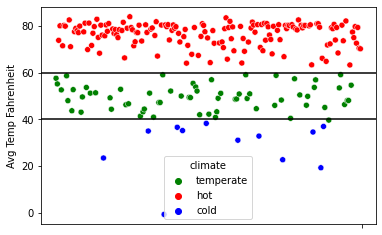

In [416]:
#Create a plot of the temperatures and the assigned cluster
sns.scatterplot(data=climate2, x=climate2.index, y='Avg Temp Fahrenheit', hue='climate', palette=['g', 'r', 'b'], legend='full')
plt.axhline(y = 60, color = 'black', linestyle = '-')
plt.axhline(y = 40, color = 'black', linestyle = '-')
plt.xticks('')
plt.xlabel('')

Our best guess categorization and the k-means clustering only differed by 1 assignment. K-means drew the cutoff point of cold and temperate at a slightly lower temperature than the 40 degrees we had originally.

In [417]:
print(climate2.groupby('climate').count())
print(climate.groupby('Climate').count())

           Avg Temp Fahrenheit
climate                       
cold                        12
hot                        156
temperate                   64
          Avg Temp Fahrenheit
Climate                      
Cold                       13
Moderate                   63
Hot                       156


Index(['id', 'name', 'geometry'], dtype='object')


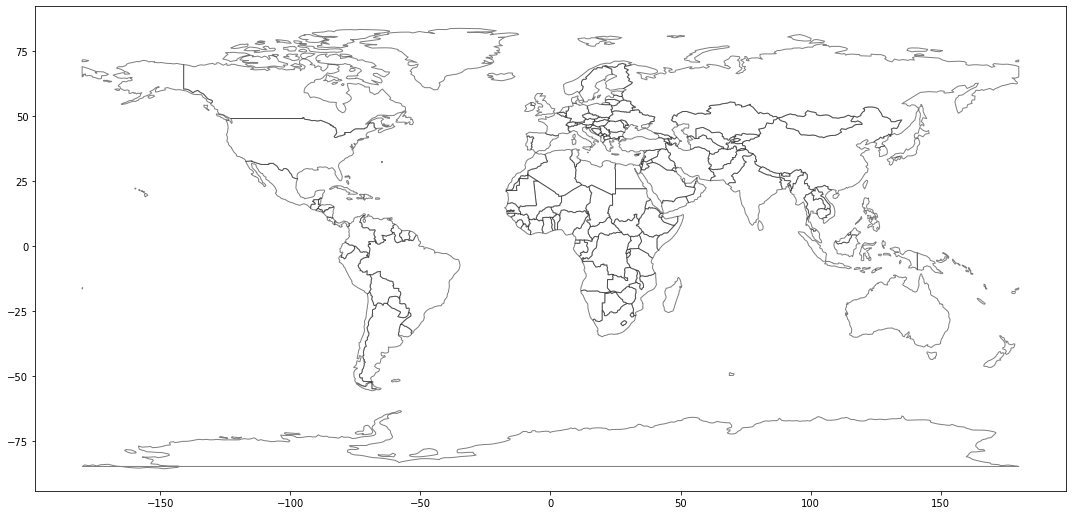

In [418]:
import geopandas as gpd

countries_geo = gpd.read_file('countries.geojson')
print(countries_geo.columns)

countries_geo.plot(figsize=(15, 9), alpha=0.5, edgecolor='k', color='white')
plt.tight_layout()
plt.show()

In [419]:
countries_df=pd.merge(countries_geo, climate2, how='left', left_on='name', right_on='Country')
countries_df

,id,name,geometry,Avg Temp Fahrenheit,climate
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",57.606536,temperate
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",71.532228,hot
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",55.194766,temperate
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",82.177783,hot
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",58.666728,temperate
...,...,...,...,...,...
175,PSE,West Bank,"POLYGON ((35.54566 32.39399, 35.54525 31.78251...",NaN,NaN
176,YEM,Yemen,"POLYGON ((53.10857 16.65105, 52.38521 16.38241...",79.393386,hot
177,ZAF,South Africa,"POLYGON ((31.52100 -29.25739, 31.32556 -29.401...",63.365396,hot
178,ZMB,Zambia,"POLYGON ((32.75937 -9.23060, 33.23139 -9.67672...",70.519724,hot


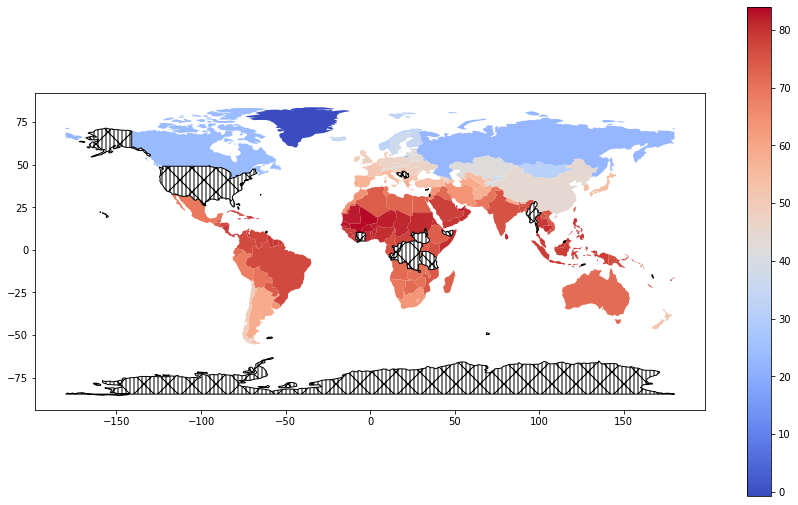

In [420]:
fig, ax = plt.subplots(figsize=(15, 9), alpha=0.5, edgecolor='k')
countries_df.plot(column='Avg Temp Fahrenheit',
               cmap='coolwarm',
               #edgecolor='k',
               linewidth=1,
               legend=True,
               missing_kwds={'color': 'white',
                          'edgecolor': 'black',
                          'hatch': '|\|/|',
                          'label': 'Missing'},
               ax=ax)
plt.show()

In [432]:
temp_palette = {'cold': 'blue', 'temperate': 'green', 'hot': 'red', np.NAN:'white' }

/var/folders/j_/38n39dnj4z9gdmy4w2vpg1pr0000gn/T/ipykernel_96548/95919309.py:2: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  countries_df.plot(column='climate',


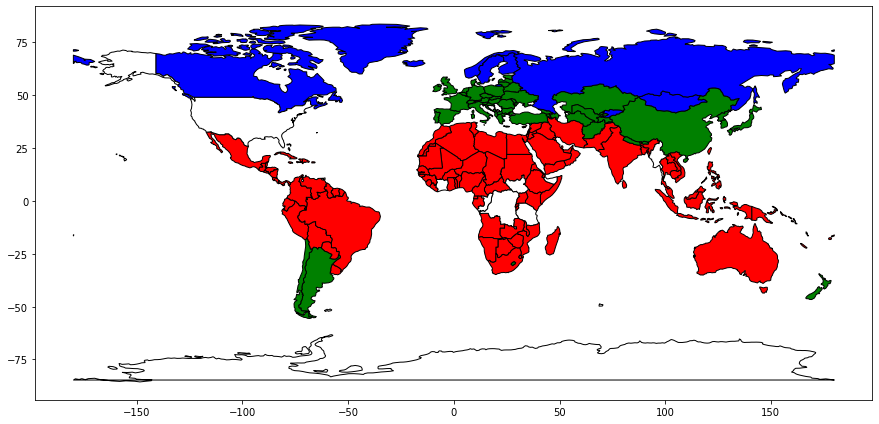

In [433]:
fig2, ax2 = plt.subplots(figsize=(15, 9), alpha=0.5, edgecolor='k')
countries_df.plot(column='climate',
               #cmap='coolwarm',
               linewidth=1,
               legend=True,
               edgecolor='k',
               color=countries_df['climate'].map(temp_palette), 
               ax=ax2)
plt.show()

We can see we are missing a few countries, this would be due to differentiation of country names between the two merged data frames.

In [434]:
countries_df[countries_df['climate'].isnull()]
#climate2.reset_index
missing=pd.merge(countries_geo, climate2.reset_index(), how='outer', left_on='name', right_on='Country')
m2=pd.merge(climate2, countries_geo, how='outer', left_on='Country', right_on='name')
missing[(missing['climate'].isnull()) | (missing['name'].isnull())]
missing[missing['climate'].isnull()]

,id,name,geometry,Country,Avg Temp Fahrenheit,climate
6,ATA,Antarctica,"MULTIPOLYGON (((-59.57209 -80.04018, -59.86585...",NaN,NaN,NaN
7,ATF,French Southern and Antarctic Lands,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",NaN,NaN,NaN
17,BHS,The Bahamas,"MULTIPOLYGON (((-77.53466 23.75975, -77.78000 ...",NaN,NaN,NaN
18,BIH,Bosnia and Herzegovina,"POLYGON ((19.00549 44.86023, 19.36803 44.86300...",NaN,NaN,NaN
21,BMU,Bermuda,"POLYGON ((-64.77997 32.30720, -64.78733 32.303...",NaN,NaN,NaN
24,BRN,Brunei,"POLYGON ((114.20402 4.52587, 114.59996 4.90001...",NaN,NaN,NaN
32,CIV,Ivory Coast,"POLYGON ((-2.85613 4.99448, -3.31108 4.98430, ...",NaN,NaN,NaN
34,COD,Democratic Republic of the Congo,"POLYGON ((30.83386 3.50917, 30.77335 2.33988, ...",NaN,NaN,NaN
35,COG,Republic of the Congo,"POLYGON ((12.99552 -4.78110, 12.62076 -4.43802...",NaN,NaN,NaN
39,-99,Northern Cyprus,"POLYGON ((32.73178 35.14003, 32.80247 35.14550...",NaN,NaN,NaN


In [424]:
climate2[climate2.index.str.contains('Island')]

,Avg Temp Fahrenheit,climate
Country,,
Baker Island,78.029807,hot
British Virgin Islands,79.763483,hot
Cayman Islands,80.479170,hot
Christmas Island,78.743066,hot
Falkland Islands (Islas Malvinas),43.228470,temperate
Faroe Islands,44.424351,temperate
Heard Island And Mcdonald Islands,36.611807,cold
Northern Mariana Islands,80.594302,hot
Solomon Islands,80.070076,hot


In [435]:
old=['United States','Bahamas','Congo','Congo (Democratic Republic Of The)','Côte D\'Ivoire','Tanzania','Burma','Serbia','Bosnia And Herzegovina','French Southern And Antarctic Lands','Trinidad And Tobago','Falkland Islands (Islas Malvinas)','Timor Leste']
new=['United States of America','The Bahamas','Republic of the Congo','Democratic Republic of the Congo','Ivory Coast','United Republic of Tanzania','Myanmar','Republic of Serbia','Bosnia and Herzegovina','French Southern and Antarctic Lands','Trinidad and Tobago','Falkland Islands','East Timor']
climate3=climate2.reset_index()
climate3['Country'].replace(old,new, inplace=True)
climate3

,Country,Avg Temp Fahrenheit,climate
0,Afghanistan,57.606536,temperate
1,Albania,55.194766,temperate
2,Algeria,73.879181,hot
3,American Samoa,80.095117,hot
4,Andorra,52.631964,temperate
...,...,...,...
227,Virgin Islands,79.763483,hot
228,Western Sahara,72.650865,hot
229,Yemen,79.393386,hot
230,Zambia,70.519724,hot


/var/folders/j_/38n39dnj4z9gdmy4w2vpg1pr0000gn/T/ipykernel_96548/1614440925.py:4: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  countries_df_cleaned.plot(column='climate',


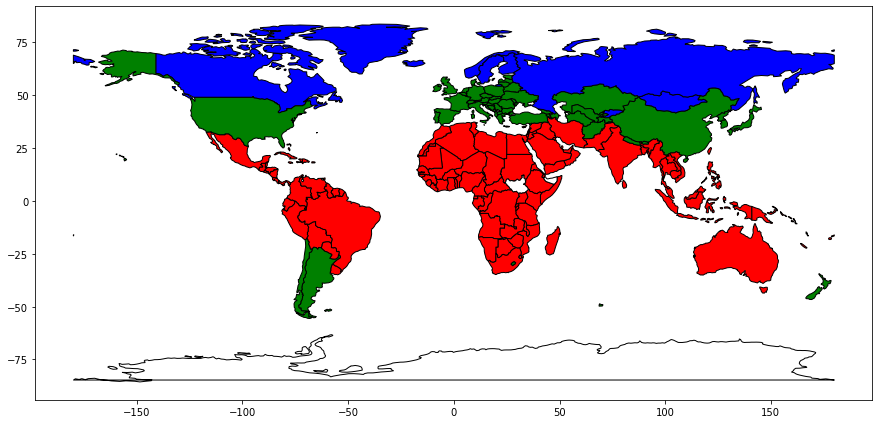

In [436]:
countries_df_cleaned=pd.merge(countries_geo, climate3, how='left', left_on='name', right_on='Country')

fig3, ax3 = plt.subplots(figsize=(15, 9), alpha=0.5, edgecolor='k')
countries_df_cleaned.plot(column='climate',
               linewidth=1,
               legend=True,
               edgecolor='k',
               color=countries_df_cleaned['climate'].map(temp_palette),
               ax=ax3)
plt.show()

In [437]:
countries_df_cleaned[countries_df_cleaned['climate'].isnull()]

,id,name,geometry,Country,Avg Temp Fahrenheit,climate
6,ATA,Antarctica,"MULTIPOLYGON (((-59.57209 -80.04018, -59.86585...",NaN,NaN,NaN
21,BMU,Bermuda,"POLYGON ((-64.77997 32.30720, -64.78733 32.303...",NaN,NaN,NaN
24,BRN,Brunei,"POLYGON ((114.20402 4.52587, 114.59996 4.90001...",NaN,NaN,NaN
39,-99,Northern Cyprus,"POLYGON ((32.73178 35.14003, 32.80247 35.14550...",NaN,NaN,NaN
90,CS-KM,Kosovo,"POLYGON ((20.76216 42.05186, 20.71731 41.84711...",NaN,NaN,NaN
142,SSD,South Sudan,"POLYGON ((33.96339 9.46429, 33.97498 8.68456, ...",NaN,NaN,NaN
147,-99,Somaliland,"POLYGON ((48.93813 9.45175, 48.48674 8.83763, ...",NaN,NaN,NaN
174,VUT,Vanuatu,"MULTIPOLYGON (((167.84488 -16.46633, 167.51518...",NaN,NaN,NaN
175,PSE,West Bank,"POLYGON ((35.54566 32.39399, 35.54525 31.78251...",NaN,NaN,NaN


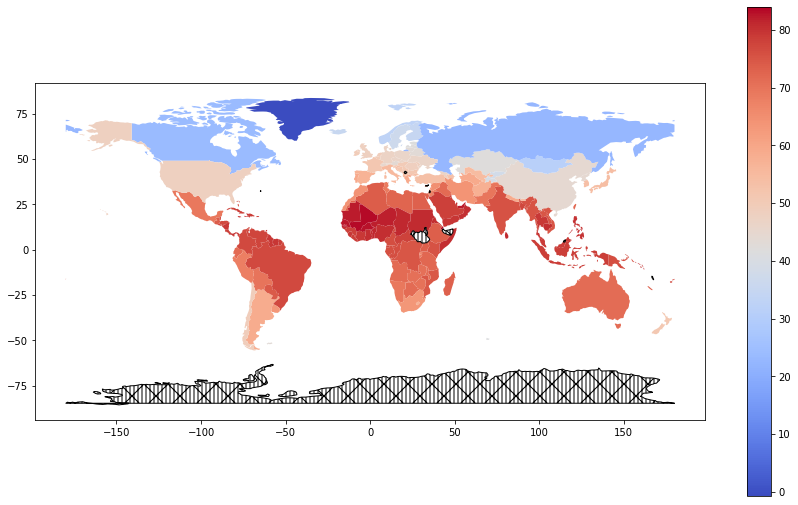

In [438]:
fig, ax = plt.subplots(figsize=(15, 9), alpha=0.5, edgecolor='k')
countries_df_cleaned.plot(column='Avg Temp Fahrenheit',
               cmap='coolwarm',
               #edgecolor='k',
               linewidth=1,
               legend=True,
               missing_kwds={'color': 'white',
                          'edgecolor': 'black',
                          'hatch': '|\|/|',
                          'label': 'Missing'},
               ax=ax)
plt.show()

/var/folders/j_/38n39dnj4z9gdmy4w2vpg1pr0000gn/T/ipykernel_96548/2506855856.py:5: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  countries_plot = countries_df_cleaned.plot(column='climate',


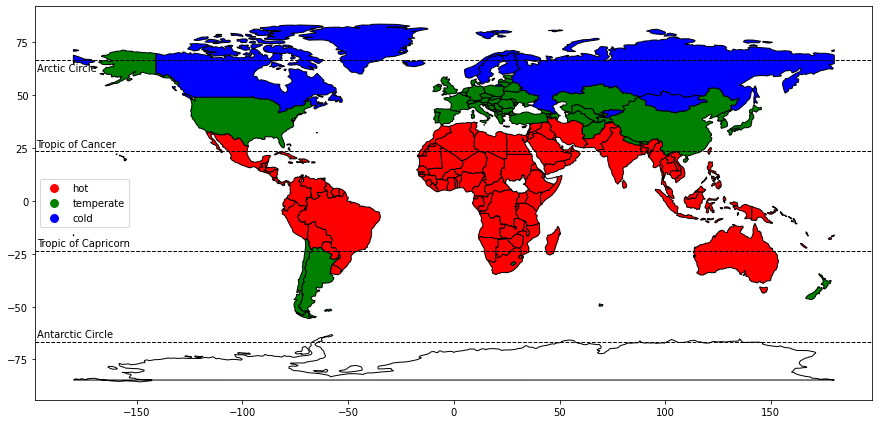

In [504]:
from matplotlib.colors import ListedColormap


fig3, ax3 = plt.subplots(figsize=(15, 9), alpha=0.5, edgecolor='k')
countries_plot = countries_df_cleaned.plot(column='climate',
                                          linewidth=1,
                                          legend=True,
                                          edgecolor='k',
                                          color=countries_df_cleaned['climate'].map(temp_palette),
                                          ax=ax3)

# Adding reference lines for the Tropic of Cancer and the Tropic of Capricorn
ax3.axhline(y=23.5, color='black', linestyle='--', linewidth=1)  # Tropic of Cancer
ax3.axhline(y=-23.5, color='black', linestyle='--', linewidth=1)  # Tropic of Capricorn
# Adding reference lines for the Arctic Circle and the Antarctic Circle
ax3.axhline(y=66.5, color='black', linestyle='--', linewidth=1)  # Arctic Circle
ax3.axhline(y=-66.5, color='black', linestyle='--', linewidth=1)  # Antarctic Circle

# Adding labels for the tropic lines and the arctic circle lines on the right side of the map
max_x = countries_df_cleaned.total_bounds[0]  # Get the maximum x-coordinate of the map
offset = 20  # Adjust the offset for the label position
ax3.text(max_x + offset, 25.5, 'Tropic of Cancer', ha='right', color='black')
ax3.text(max_x + offset+7, -21.5, 'Tropic of Capricorn', ha='right', color='black')
ax3.text(max_x + offset-9, 61.5, 'Arctic Circle', ha='right', color='black')
ax3.text(max_x + offset-1, -64.5, 'Antarctic Circle', ha='right', color='black')


# Adding a custom legend
legend_dict = {k: plt.Line2D([0], [0], marker='o', color='w', label=k, markerfacecolor=v, markersize=10) for k, v in temp_palette.items() if not isinstance(k, float)}
handles = list(legend_dict.values())[::-1]  # Reverse the order of handles
labels = [h.get_label() for h in handles]
ax3.legend(handles=handles, labels=labels, loc='center left')

plt.show()



In [476]:
countries_df_cleaned.total_bounds

array([-180.      ,  -85.609038,  180.      ,   83.64513 ])